# **Importing Model Building Libraries**

---



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# **Downloading the Dataset**

---



In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d saumyamohandas/animal-dataset

 69% 43.0M/62.3M [00:00<00:00, 234MB/s]
100% 62.3M/62.3M [00:00<00:00, 240MB/s]


In [ ]:
!unzip /content/animal-dataset.zip

Archive:  /content/animal-dataset.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  in

# **Image Preprocessing**

---



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

## **Configuring Image Data Generator**

---



In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                   zoom_range=0.2,horizontal_flip=True)
test_datagen  = ImageDataGenerator(rescale=1./255)

## **Apply Image Data Generator Functionality to Training & Testing Images**

---



In [ ]:
X_train = train_datagen.flow_from_directory("/content/dataset/Training",
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode = "categorical")

Found 1238 images belonging to 4 classes.


In [ ]:
X_test = train_datagen.flow_from_directory("/content/dataset/Testing",
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode = "categorical")

Found 326 images belonging to 4 classes.


In [ ]:
print(X_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


# **Model Building**

---



## **Model Initialisation**

---



In [ ]:
cnn_model = Sequential()

## **Adding Layers to the Model**

---



Convolution Layer

In [ ]:
cnn_model.add(Convolution2D(32, (3,3), input_shape=(64,64,3), activation="relu"))

Max Pooling Layer

In [ ]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

Flatting Inputs

In [ ]:
cnn_model.add(Flatten())

ANN Hidden Layer

In [ ]:
cnn_model.add(Dense(units=128, activation="relu"))

Output Layer

In [ ]:
cnn_model.add(Dense(units=4, activation="softmax"))

## **Model Compilation**

---



In [ ]:
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

steps_per_epoch = Number of Samples in Training/Batch Size

In [ ]:
cnn_model.fit(X_train, steps_per_epoch=39, epochs=10,
              validation_data=X_test, validation_steps=10)

Epoch 1/10
39/39 [==============================] - 11s 266ms/step - loss: 1.8358 - accuracy: 0.3611 - val_loss: 1.1541 - val_accuracy: 0.5562
Epoch 2/10
39/39 [==============================] - 10s 263ms/step - loss: 1.0425 - accuracy: 0.5969 - val_loss: 0.8704 - val_accuracy: 0.6469
Epoch 3/10
39/39 [==============================] - 11s 292ms/step - loss: 0.8622 - accuracy: 0.6656 - val_loss: 0.7773 - val_accuracy: 0.7031
Epoch 4/10
39/39 [==============================] - 11s 289ms/step - loss: 0.7923 - accuracy: 0.6931 - val_loss: 0.6364 - val_accuracy: 0.7906
Epoch 5/10
39/39 [==============================] - 10s 260ms/step - loss: 0.7167 - accuracy: 0.7124 - val_loss: 0.6215 - val_accuracy: 0.8031
Epoch 6/10
39/39 [==============================] - 10s 254ms/step - loss: 0.6436 - accuracy: 0.7488 - val_loss: 0.4927 - val_accuracy: 0.8313
Epoch 7/10
39/39 [==============================] - 10s 266ms/step - loss: 0.5987 - accuracy: 0.7706 - val_loss: 0.4979 - val_accuracy: 0.8469

In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               3936384   
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
cnn_model.save("animal_cnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Test the Model**

---



In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model("animal_cnn.h5", compile=False)

In [ ]:
img = image.load_img("1.jpeg", target_size=(64,64))

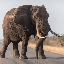

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[219., 222., 227.],
        [219., 222., 227.],
        [219., 222., 227.],
        ...,
        [214., 217., 224.],
        [214., 217., 224.],
        [214., 217., 224.]],

       [[221., 224., 229.],
        [221., 224., 229.],
        [221., 224., 229.],
        ...,
        [216., 219., 226.],
        [216., 219., 226.],
        [216., 219., 226.]],

       [[222., 225., 230.],
        [222., 225., 230.],
        [222., 225., 230.],
        ...,
        [219., 222., 229.],
        [219., 222., 229.],
        [219., 222., 229.]],

       ...,

       [[174., 155., 141.],
        [172., 152., 141.],
        [172., 152., 145.],
        ...,
        [134., 125., 120.],
        [131., 122., 117.],
        [136., 127., 122.]],

       [[176., 157., 143.],
        [174., 154., 143.],
        [168., 148., 141.],
        ...,
        [131., 122., 117.],
        [128., 119., 114.],
        [137., 128., 123.]],

       [[174., 155., 141.],
        [171., 151., 140.],
        [170., 1

###The input shape is
            batch_size x width x hieght x number of channels

In [ ]:
x = np.expand_dims(x, axis=0)

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
y_preds = model.predict(x)

1/1 [==============================] - 0s 106ms/step


In [ ]:
y_preds

array([[0., 0., 1., 0.]], dtype=float32)

In [ ]:
preds_class = np.argmax(y_preds, axis=1)[0]

In [ ]:
preds_class

2

In [ ]:
index = ["bear", "crow", "elephant", "rat"]

In [ ]:
result = index[preds_class]

In [ ]:
result

'elephant'